# Лабораторная работа №2
## ПРОГНОЗИРОВАНИЕ ВРЕМЕННЫХ РЯДОВ НА ОСНОВЕ НЕЙРОННЫХ СЕТЕЙ В MATLAB
Комлева Юлия Владимировна

Вариант: 9

Группа: РИМ-281226

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.io import loadmat,savemat
import h5py
import numpy as np
import os
import pandas as pd
import seaborn
%matplotlib inline

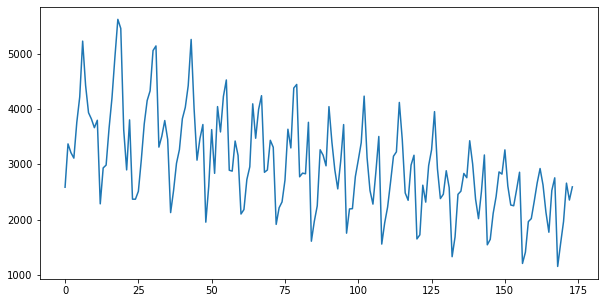

In [2]:
file = h5py.File('Fort.mat','r')
data = file.get('Fort')
fort = np.array(data)
F = np.ravel(fort)
N_fort = len(F)
plt.figure(figsize = (10, 5))
plt.plot(F)
plt.show()

### Базисная модель ряда для NARX

In [3]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    #шаг вложения
    for i in range(0, L): #rows
        for j in range(0, K):
            X[i,j] = F[i+j]
    #X = np.column_stack([F[i:i+L] for i in range(0,K)])
    #шаг сингулярного разложени]
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    # U - матрица собственных векторов
    # A - массив собственных чисел (в неубывающем порядке)
    V = np.dot(X.T, U) #матрица траекторных векторов
    return A, U, V
def SSA_group(A, U, V, N, I):
    
    L = len(A)
    K = N - L + 1

    #шаг группировки
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])

    #этап диагонального усреднения
    G = np.zeros(N)
    L_ = min(L, K)
    K_ = max(L, K)    
    
    for k in range(0, L_):
        for m in range(0, k + 1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(k+1)
    for k in range(L_, K_):
        for m in range(0, L_):    
            G[k] += Z[m][k-m]   
        G[k] *= 1/L_
    for k in range(K_, N):
        for m in range(k-K_+1, N-K_+1):
            G[k] += Z[m][k-m]
        G[k] *= 1/(N-k)
    return G


In [4]:
L_fort = 84 #12
A, U, V = SSA_modes(F, L_fort)
ssaF0 = SSA_group(A, U, V, N_fort, [0])
ssaF1 = SSA_group(A, U, V, N_fort, [1])
ssaF2 = SSA_group(A, U, V, N_fort, [2])
ssaF3 = SSA_group(A, U, V, N_fort, [3])
ssaF4 = SSA_group(A, U, V, N_fort, [4])
ssaF5 = SSA_group(A, U, V, N_fort, [5])

ssaF01 = SSA_group(A, U, V, N_fort, [0, 1])
ssaF02 = SSA_group(A, U, V, N_fort, [0, 2])
ssaF03 = SSA_group(A, U, V, N_fort, [0, 3])
ssaF04 = SSA_group(A, U, V, N_fort, [0, 4])
ssaF05 = SSA_group(A, U, V, N_fort, [0, 5])

ssaF12 = SSA_group(A, U, V, N_fort, [1, 2])
ssaF13 = SSA_group(A, U, V, N_fort, [1, 3])
ssaF14 = SSA_group(A, U, V, N_fort, [1, 4])
ssaF15 = SSA_group(A, U, V, N_fort, [1, 5])

ssaF23 = SSA_group(A, U, V, N_fort, [2, 3])
ssaF24 = SSA_group(A, U, V, N_fort, [2, 4])
ssaF25 = SSA_group(A, U, V, N_fort, [2, 5])

ssaF34 = SSA_group(A, U, V, N_fort, [3, 4])
ssaF35 = SSA_group(A, U, V, N_fort, [3, 5])

ssaF45 = SSA_group(A, U, V, N_fort, [4, 5])

ssaF234 = SSA_group(A, U, V, N_fort, [2, 3, 4])

ssaF56 = SSA_group(A, U, V, N_fort, [5, 6])
ssaF6 = SSA_group(A, U, V, N_fort, [6])

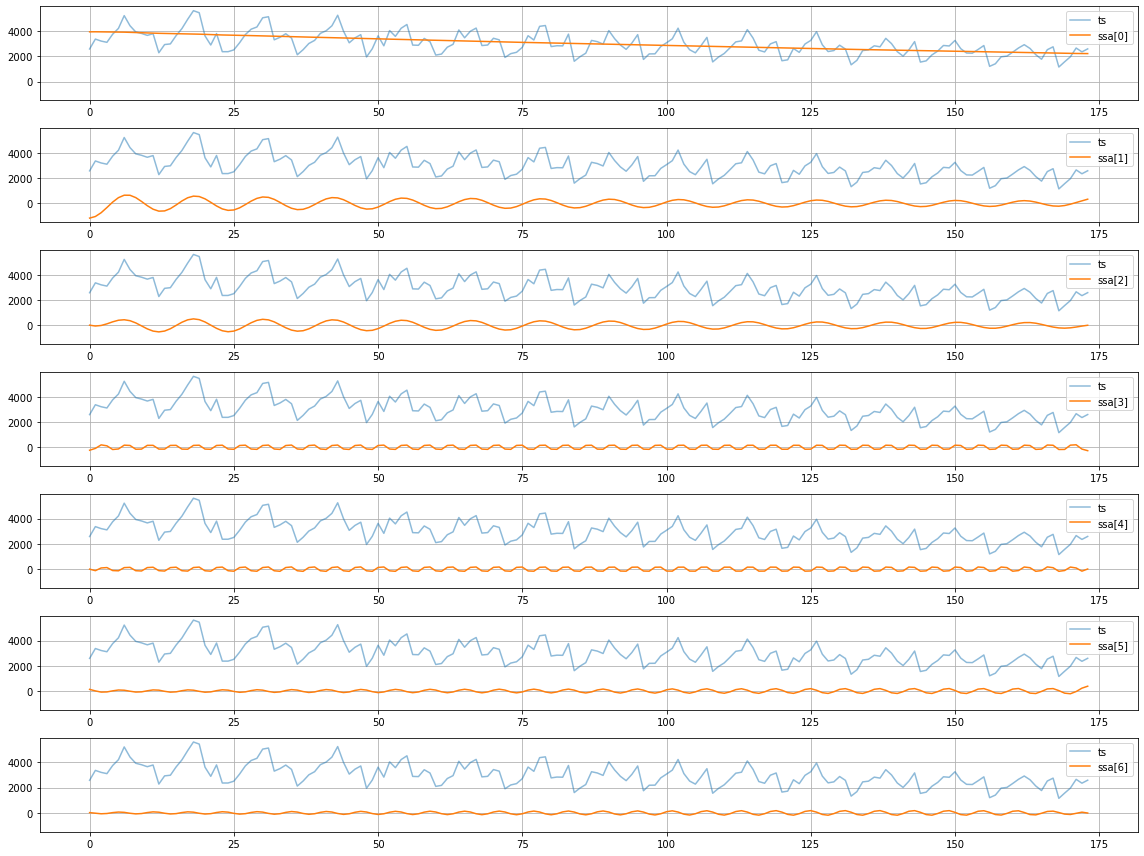

In [5]:
fig, ax = plt.subplots(7, 1, figsize=(16, 12), sharey = True)

ax[0].plot(F, label = 'ts', alpha=0.5)
ax[0].plot(ssaF0, label = 'ssa[0]')

ax[1].plot(F, label = 'ts', alpha=0.5)
ax[1].plot(ssaF1, label = 'ssa[1]')

ax[2].plot(F, label = 'ts', alpha=0.5)
ax[2].plot(ssaF2, label = 'ssa[2]')

ax[3].plot(F, label = 'ts', alpha=0.5)
ax[3].plot(ssaF3, label = 'ssa[3]')

ax[4].plot(F, label = 'ts', alpha=0.5)
ax[4].plot(ssaF4, label = 'ssa[4]')

ax[5].plot(F, label = 'ts', alpha=0.5)
ax[5].plot(ssaF5, label = 'ssa[5]')

ax[6].plot(F, label = 'ts', alpha=0.5)
ax[6].plot(ssaF6, label = 'ssa[6]')

for a in ax.flat:
    a.grid()
    a.legend()



plt.tight_layout()
plt.show()

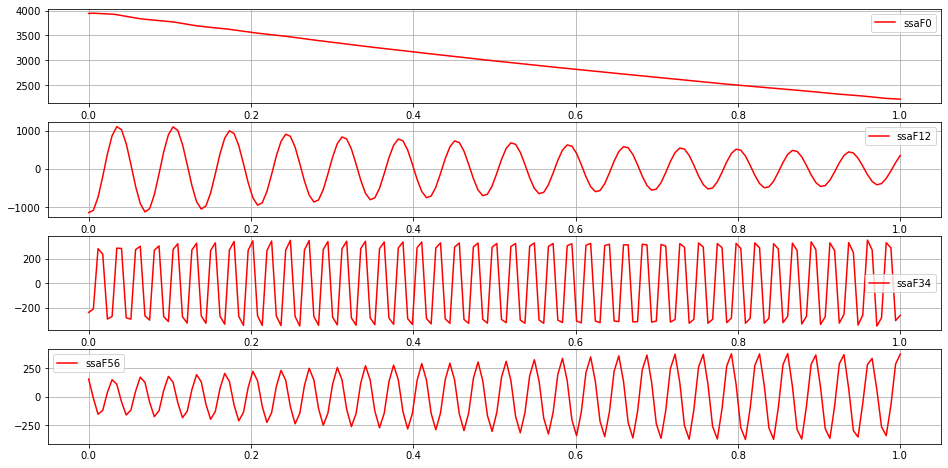

In [6]:
t_fort = np.linspace(0, 1, N_fort)
fig, ax = plt.subplots(4, 1, figsize=(16, 8))

ax[0].plot(t_fort, ssaF0, 'r', label='ssaF0')


ax[1].plot(t_fort, ssaF12, 'r', label='ssaF12')


ax[2].plot(t_fort, ssaF34, 'r', label='ssaF34') 

ax[3].plot(t_fort, ssaF56, 'r', label='ssaF56') 
for a in ax.flat:
    a.grid()
    a.legend()
plt.show()

In [7]:
savemat('xt.mat', {'xt':ssaF12})

<table border="0">
 <tr>
    <td><b style="font-size:30px"></b></td>
    <td><b style="font-size:30px">NARX</b></td>
     <td><b style="font-size:30px">NAR</b></td>
 </tr>
 <tr>
     <td><b style="font-size:16px">Neural Network Diagram</b></td>
    <td><img src="images/nar/net.png"/></td>
    <td><img src="images/narx/net.png"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Performance</b>
         <br>
         Cкорость сходимости минимизации среднеквадратичной ошибки MSE от итерации обучения сети</td>
    <td><img src="images/nar/plotperform.jpg"/></td>
    <td><img src="images/narx/plotperform.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Training State</b>
     <br>
     Параметры обучения нейронной сети от итерации (эпохи/вехи) обучения</td>
    <td><img src="images/nar/plottrainstate.jpg"/></td>
    <td><img src="images/narx/plottrainstate.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Error Histogram</b>
     <br>Oценка плотности распределения остаточного ряда (ряд ошибок между моделью и ВР)
     </td>
    <td><img src="images/nar/ploterrhist.jpg"/></td>
    <td><img src="images/narx/ploterrhist.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Regression</b>
     <br>Регрессионные зависимости, которые
служат оценкой корреляционного момента R между моделью и ВР</td>
    <td><img src="images/nar/plotregression.jpg"/></td>
    <td><img src="images/narx/plotregression.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Time-Series Response</b>
     <br>Отсчеты исходного ряда и отсчеты,
найденные по модели + остаточный ряд</td>
    <td><img src="images/nar/plotresponse.jpg"/></td>
    <td><img src="images/narx/plotresponse.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Error Autocorrelation</b>
     <br>Функция автокорреляции
ряда остатков</td>
    <td><img src="images/nar/ploterrcorr.jpg"/></td>
    <td><img src="images/narx/ploterrcorr.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">plotinerrcorr</b></td>
    <td><img src="images/nar/plotinerrcorr.jpg"/></td>
    <td><img src="images/narx/plotinerrcorr.jpg"/></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Реальный прогноз70</b></td>
    <td><img src="images/nar/future.jpg"/></td>
    <td></td>
      </tr>
 <tr>
     <td><b style="font-size:16px">Ретроспективный прогноз 70</b></td>
    <td><img src="images/nar/retrospective.jpg"/></td>
    <td><img src="images/narx/retrospective.jpg"/></td>
 </tr>

</table>

In [17]:
df = pd.read_csv('data.csv')

In [18]:
#import utils
#df = utils.get_df()
#df.to_csv('data.csv', index=False)
#df = df.drop(['val_mse'], axis=1)
#layers = [1, 5, 10, 15, 20, 25, 30, 35, 40]
#delays = layers
#f = df.loc[(df['layers'].isin(layers)) & (df['delay'].isin(delays))]

In [19]:
df.head()

,model,train_fcn,delay,layers,mse,train_mse,test_mse
0,nar,trainbr,10,1,343056.216770,3.459736e+05,326835.701781
1,nar,trainbr,10,10,45672.451273,6.038949e+03,266034.721896
2,nar,trainbr,10,15,38518.333897,2.920391e-10,252680.270364
3,nar,trainbr,10,20,110699.731875,2.276594e-09,726190.241101
4,nar,trainbr,10,25,65355.241480,1.009148e-17,428730.384107


In [20]:
df.shape

(486, 7)

#### NAR/NARX
- model 2
- layers [ 1,  5, 10, 15, 20, 25, 30, 35, 40]
- delays [ 1,  5, 10, 15, 20, 25, 30, 35, 40]
- fcn 3
- 9 * 9 * 3 * 2 = 486

In [211]:
layers = [1, 5, 10, 15, 20, 25, 30, 35, 40]

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [114]:

nar = df.loc[df['model'] == 'nar']
narx = df.loc[df['model'] == 'narx']

models = df['model'].drop_duplicates().sort_values().values.tolist()
layers_nar = nar['layers'].drop_duplicates().sort_values().values.tolist()
layers_narx = narx['layers'].drop_duplicates().sort_values().values.tolist()
delays_nar = nar['delay'].drop_duplicates().sort_values().values.tolist()
delays_narx = narx['delay'].drop_duplicates().sort_values().values.tolist()
fcn = nar['train_fcn'].drop_duplicates().sort_values().values.tolist()


In [ ]:
tmp = df.loc[(tmp1['layers'].isin(layers_narx)) & (df['delay'].isin(delays_narx))]

## NAR vs NARX
- При увеличении delays и layers уменьшается MSE

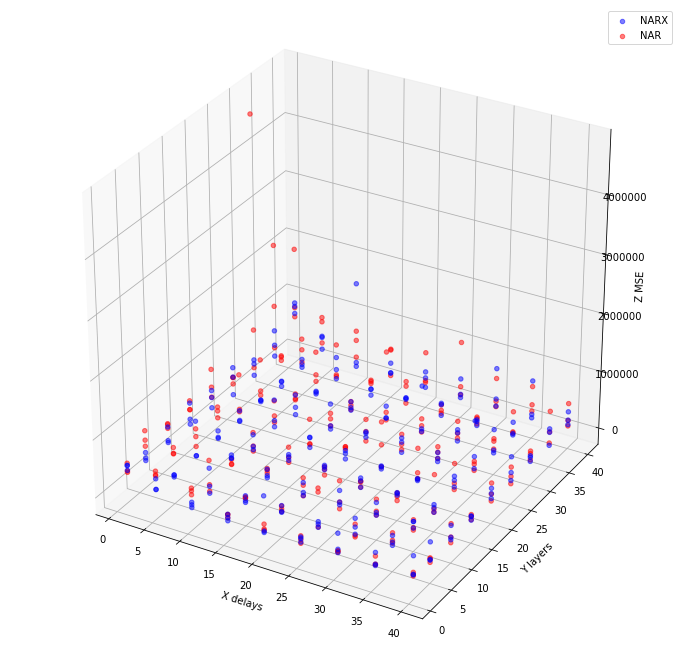

In [21]:
nar = df.loc[(df['model'] == 'nar')]
narx = df.loc[(df['model'] == 'narx')]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(narx['delay'], narx['layers'], narx['test_mse'], c='b', alpha=0.5, label='NARX')
ax.scatter(nar['delay'], nar['layers'], nar['test_mse'], c='r', alpha=0.5, label='NAR')
ax.set_xlabel('X delays')
ax.set_ylabel('Y layers')
ax.set_zlabel('Z MSE')
plt.legend()
plt.show()

delay = 40

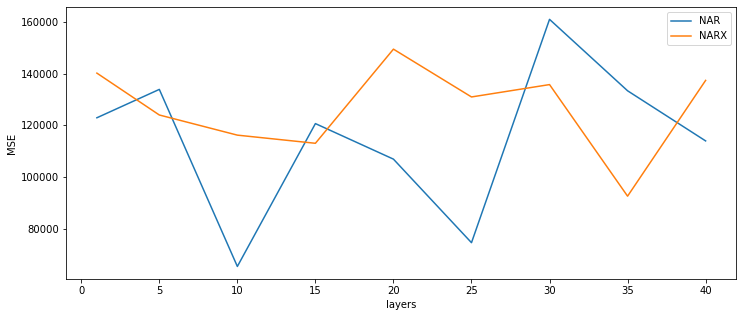

In [22]:
nar = nar.loc[(nar['delay'] == 40) & (nar['train_fcn'] == 'trainbr')].sort_values('layers')
narx = narx.loc[(narx['delay'] == 40) & (narx['train_fcn'] == 'trainbr')].sort_values('layers')
plt.figure(figsize=(12,5))
plt.plot(nar['layers'], nar['test_mse'], label = 'NAR')
plt.plot(narx['layers'], narx['test_mse'], label='NARX')
plt.xlabel('layers')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Сравнение методов обучения модели
model = NAR
- Bayesian Regularization - самый точный и медленный метод

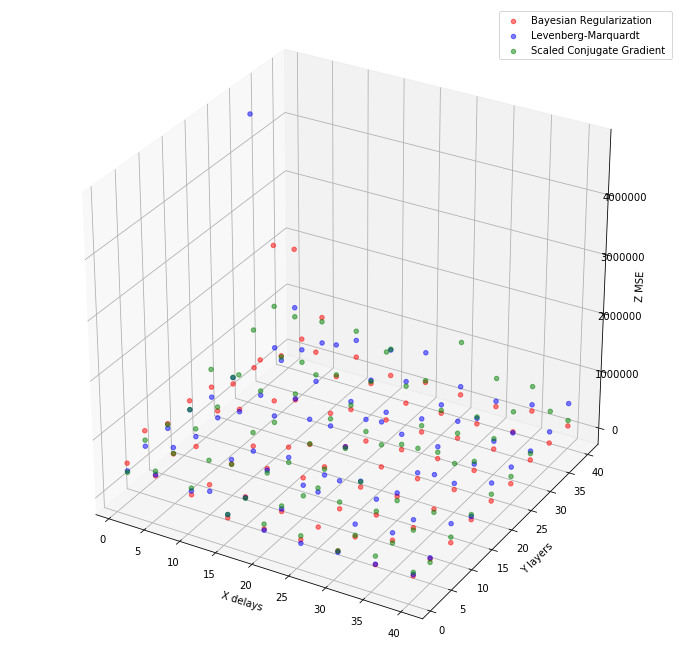

In [24]:
nar = df.loc[(df['model'] == 'nar')]
narx = df.loc[(df['model'] == 'narx')]

br = nar.loc[(df['train_fcn'] == 'trainbr')] # Bayesian Regularization
lm = nar.loc[(df['train_fcn'] == 'trainlm')] # Levenberg-Marquardt
scg = nar.loc[(df['train_fcn'] == 'trainscg')] # Scaled Conjugate Gradient 


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(br['delay'], br['layers'], br['test_mse'], c='r', alpha=0.5, label='Bayesian Regularization')
ax.scatter(lm['delay'], lm['layers'], lm['test_mse'], c='b', alpha=0.5, label='Levenberg-Marquardt')
ax.scatter(scg['delay'], scg['layers'], scg['test_mse'], c='g', alpha=0.5, label='Scaled Conjugate Gradient ')

ax.set_xlabel('X delays')
ax.set_ylabel('Y layers')
ax.set_zlabel('Z MSE')
plt.legend()
plt.show()

delay = 40

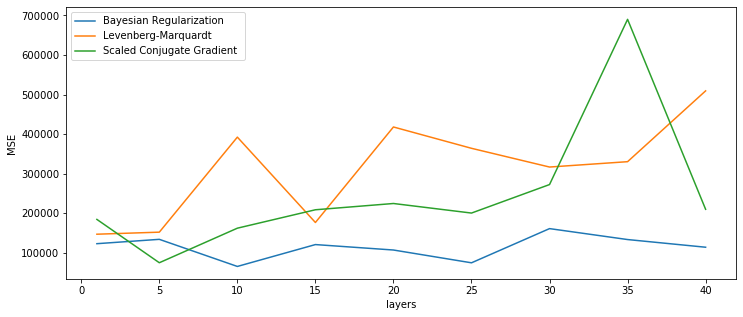

In [25]:
br = br.loc[(br['delay'] == 40)].sort_values('layers')
lm = lm.loc[(lm['delay'] == 40)].sort_values('layers')
scg = scg.loc[(scg['delay'] == 40)].sort_values('layers')
plt.figure(figsize=(12,5))
plt.plot(br['layers'], br['test_mse'], label = 'Bayesian Regularization')
plt.plot(lm['layers'], lm['test_mse'], label='Levenberg-Marquardt')
plt.plot(scg['layers'], scg['test_mse'], label='Scaled Conjugate Gradient ')
plt.xlabel('layers')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Лучшая модель

In [26]:
df.sort_values('test_mse').head(10)

,model,train_fcn,delay,layers,mse,train_mse,test_mse
218,nar,trainscg,35,15,52035.032513,51368.172704,53073.012379
299,narx,trainbr,35,15,58871.521481,59711.685491,54150.599905
283,narx,trainbr,25,25,60249.554610,60917.679295,56392.653022
37,nar,trainbr,25,10,74470.486402,76798.946124,61028.923461
209,nar,trainscg,30,15,85941.209887,84428.255880,61298.056281
64,nar,trainbr,40,10,60166.285784,59263.407279,65312.693261
258,narx,trainbr,15,35,85905.670527,89442.245616,66012.435651
270,narx,trainbr,20,1,71299.885032,72060.764449,66966.180526
285,narx,trainbr,25,35,61289.944138,60042.183450,68492.926294
31,nar,trainbr,20,25,90354.787322,94124.859707,68881.766341


In [27]:
best_scores = df.sort_values('test_mse').groupby(by=['model','train_fcn']).first()
best_scores.sort_values('test_mse')

,,delay,layers,mse,train_mse,test_mse
model,train_fcn,,,,,
nar,trainscg,35,15,52035.032513,51368.172704,53073.012379
narx,trainbr,35,15,58871.521481,59711.685491,54150.599905
nar,trainbr,25,10,74470.486402,76798.946124,61028.923461
narx,trainscg,30,20,50284.919456,35157.532722,78154.122590
nar,trainlm,25,1,75261.833966,73619.243709,78511.686300
narx,trainlm,10,1,133852.643402,130788.378322,105484.394519


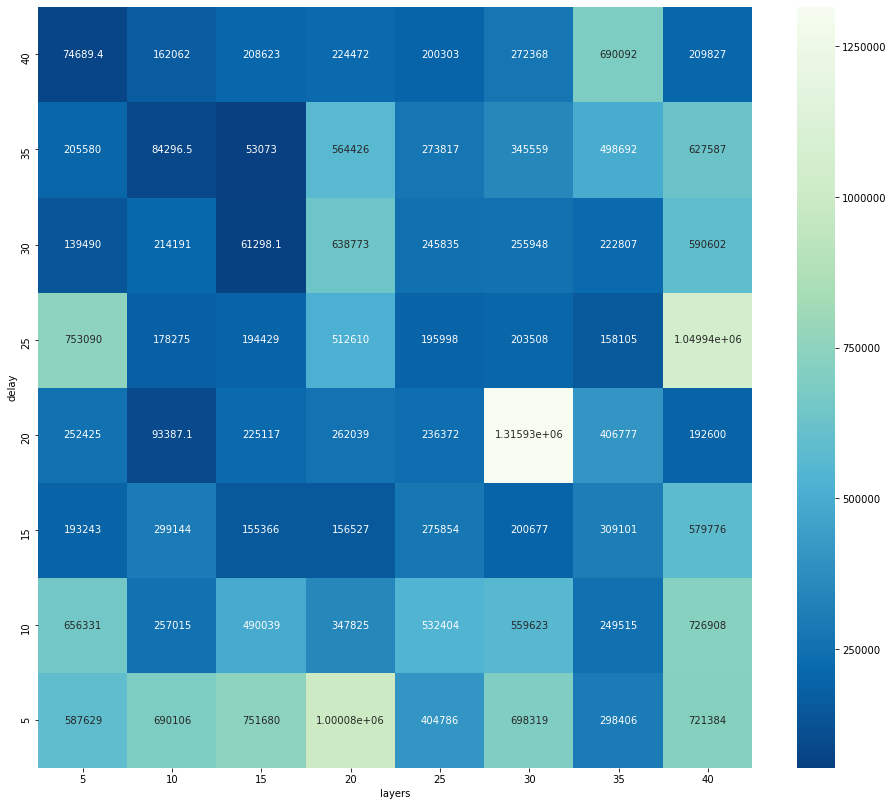

In [62]:
tmp = df.loc[(df['model'] == 'nar') & (df['train_fcn'] == 'trainscg')]
n = [5, 10, 15, 20, 25, 30, 35, 40]
tmp = tmp.loc[(tmp['layers'].isin(n)) & (tmp['delay'].isin(n))]
plt.figure(figsize = (16,14))
#seaborn.set(font_scale=1)
ax = seaborn.heatmap(tmp[['delay','layers','test_mse']].pivot('delay','layers','test_mse'), 
                annot=True, 
                annot_kws={"size": 10}, 
                fmt='g',
                cmap='GnBu_r')
ax.invert_yaxis()
plt.show()

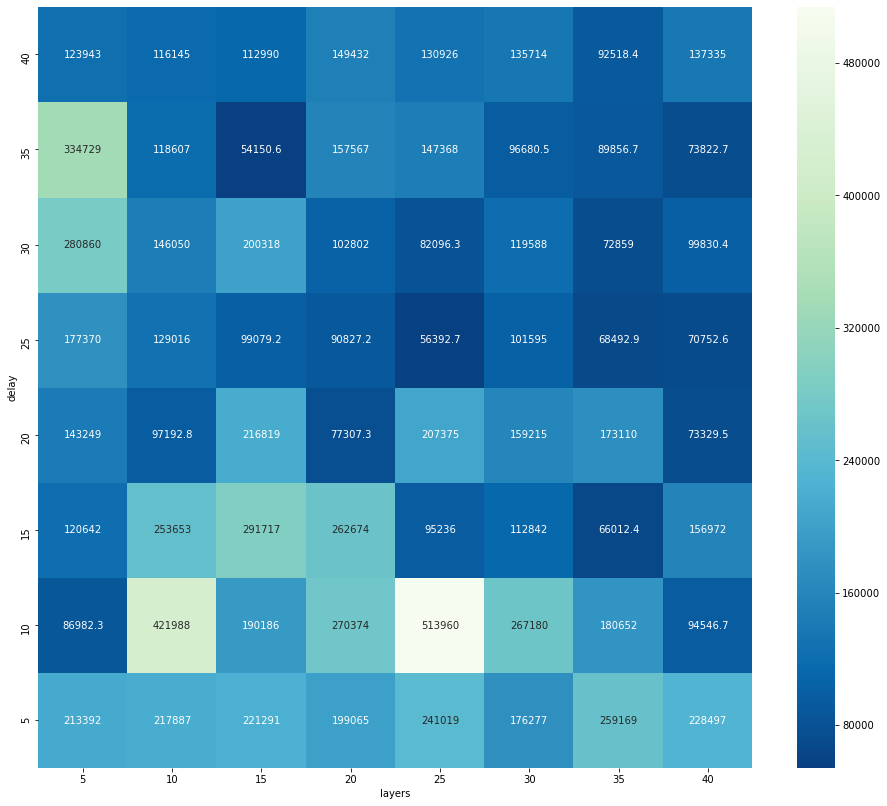

In [64]:
tmp = df.loc[(df['model'] == 'narx') & (df['train_fcn'] == 'trainbr')]
n = [5, 10, 15, 20, 25, 30, 35, 40]
tmp = tmp.loc[(tmp['layers'].isin(n)) & (tmp['delay'].isin(n))]
plt.figure(figsize = (16,14))
#seaborn.set(font_scale=1)
ax = seaborn.heatmap(tmp[['delay','layers','test_mse']].pivot('delay','layers','test_mse'), 
                annot=True, 
                annot_kws={"size": 10}, 
                fmt='g',
                cmap='GnBu_r')
ax.invert_yaxis()
plt.show()